*Datasets used in this example are a system of hard hexagons, simulated in the NVT thermodynamic ensemble in HOOMD-blue, for a dense fluid (phi065) and a solid (phi075)*

In [1]:
%matplotlib inline
# this is specifically for niceness in presentations;
# not recommended for real use
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import time
from cycler import cycler
import matplotlib
from matplotlib import pyplot
from matplotlib.colors import colorConverter
myHexColors = ["#30A2DA", "#FC4F30", "#E5AE38", "#6D904F", "#9757DB", "#188487", "#FF7F00", "#9A2C66", "#626DDA", "#8B8B8B"]
myColorCycle = [colorConverter.to_rgb(i) for i in myHexColors]
from freud import parallel
parallel.setNumThreads(4)

from ipywidgets import IntProgress
from IPython.display import display

# matplotlib.rcParams.update({'font.sans-serif': 'Helvetica'})
# matplotlib.rcParams.update({'font.family': 'sans-serif'})
matplotlib.rcParams.update({'font.size': 24})
matplotlib.rcParams.update({'axes.labelsize': 24})
matplotlib.rcParams.update({'xtick.labelsize': 18})
matplotlib.rcParams.update({'ytick.labelsize': 18})
matplotlib.rcParams.update({'savefig.pad_inches': 0.025})
matplotlib.rcParams.update({"axes.prop_cycle": cycler(color=myColorCycle)})
matplotlib.rcParams.update({"lines.linewidth": 2})

# Radial Distribution Function (RDF)

The RDF returns the probability of finding a particle centered at distance \\(r\\) from another particle in the system, relative to the ideal gas probability. The RDF is a relatively straightforward quantity to compute in simulations, and can be used to derive relevant thermodynamic quantities (those derivations will not be described or explained here). The basic algorithm is described below:

~~~
for each particle i:
    for each particle j:
        r_ij = position[j] - position[i]
        bin_ij = convert_to_bin(r_ij)
        rdf_array[bin_ij]++
~~~

`freud` uses cell lists and parallelism to optimize this algorithm. An example for computing and viewing is shown below:

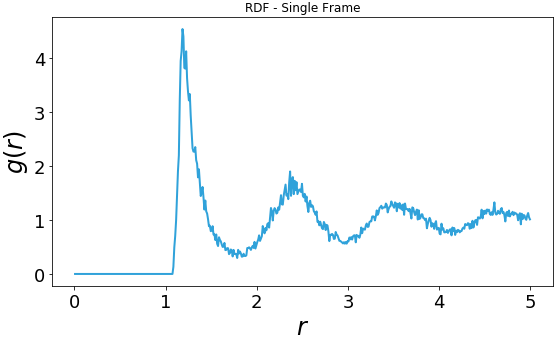

In [2]:
# import the freud object
# the rdf module is contained in the density module
from freud import box, density

# create the rdf object
rdf = density.RDF(rmax=5.0, dr=0.01)

# load the data
data_path = "ex_data/phi065"
box_data = np.load("{}/box_data.npy".format(data_path))
pos_data = np.load("{}/pos_data.npy".format(data_path))
n_frames = pos_data.shape[0]

# compute the rdf for the last frame
# read box, position data
l_box = box_data[-1]
l_pos = pos_data[-1]
# create the freud box object
fbox = box.Box(Lx=l_box["Lx"], Ly=l_box["Ly"], is2D=True)
# compute
rdf.compute(fbox, l_pos, l_pos)

# get the center of the histogram bins
r = rdf.getR()
# get the value of the histogram bins
y = rdf.getRDF()

pyplot.figure(figsize=(8, 5))
pyplot.title("RDF - Single Frame")
pyplot.plot(r, y)
pyplot.xlabel(r"$r$")
pyplot.ylabel(r"$g\left(r\right)$")
pyplot.tight_layout()
pyplot.show()

IntProgress(value=1, max=400, min=1)

time to calc 399 frames = 8.78040885925293
speed of calc: 45.442075237706916 (frames/sec)


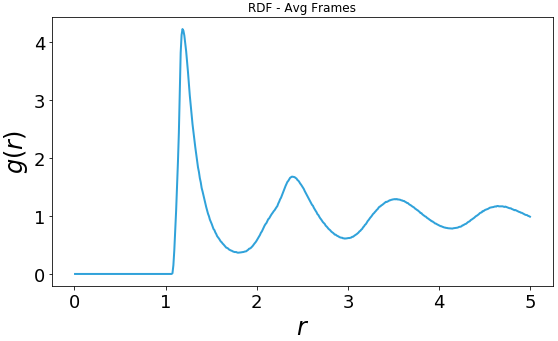

In [3]:
rdf.resetRDF()

# load the data
data_path = "ex_data/phi065"
box_data = np.load("{}/box_data.npy".format(data_path))
pos_data = np.load("{}/pos_data.npy".format(data_path))
n_frames = pos_data.shape[0]

# compute the rdf for for all frames except the first (your syntax will vary based on your reader)
myProgressBar = IntProgress(min=1,max=n_frames)
display(myProgressBar)

start_time = time.time()
for i in range(1, n_frames):
    # read box, position data
    myProgressBar.value = i
    l_box = box_data[i]
    l_pos = pos_data[i]
    # create the freud box object
    fbox = box.Box(Lx=l_box["Lx"], Ly=l_box["Ly"], is2D=True)
    # accumulate
    rdf.accumulate(fbox, l_pos, l_pos)
stop_time = time.time()
print("time to calc {} frames = {}".format(n_frames-1, stop_time-start_time))
print("speed of calc: {} (frames/sec)".format((n_frames-1)/(stop_time-start_time)))

# get the center of the histogram bins
r = rdf.getR()
# get the value of the histogram bins
y = rdf.getRDF()

pyplot.figure(figsize=(8, 5))
pyplot.title("RDF - Avg Frames")
pyplot.plot(r, y)
pyplot.xlabel(r"$r$")
pyplot.ylabel(r"$g\left(r\right)$")
pyplot.tight_layout()
pyplot.show()

IntProgress(value=1, max=400, min=1)

time to calc 399 frames = 15.44619107246399
speed of calc: 25.831611050785167 (frames/sec)


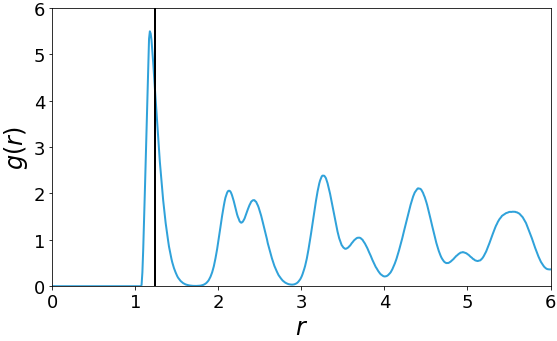

In [4]:
rdf.resetRDF()

# load the data
data_path = "ex_data/phi075"
box_data = np.load("{}/box_data.npy".format(data_path))
pos_data = np.load("{}/pos_data.npy".format(data_path))
n_frames = pos_data.shape[0]

# compute the rdf for for all frames except the first (your syntax will vary based on your reader)
myProgressBar = IntProgress(min=1,max=n_frames)
display(myProgressBar)

rdf = density.RDF(rmax=6.0, dr=0.01)

start_time = time.time()
for i in range(1, n_frames):
    # read box, position data
    myProgressBar.value = i
    l_box = box_data[i]
    l_pos = pos_data[i]
    # create the freud box object
    fbox = box.Box(Lx=l_box["Lx"], Ly=l_box["Ly"], is2D=True)
    # accumulate
    rdf.accumulate(fbox, l_pos, l_pos)
stop_time = time.time()
print("time to calc {} frames = {}".format(n_frames-1, stop_time-start_time))
print("speed of calc: {} (frames/sec)".format((n_frames-1)/(stop_time-start_time)))

# get the center of the histogram bins
r = rdf.getR()
# get the value of the histogram bins
y = rdf.getRDF()

pyplot.figure(figsize=(8, 5))
# pyplot.title("RDF - Avg Frames")
l = 0.6204032394013997
pyplot.plot(r, y)
pyplot.plot([2*l,2*l], [0,6], color="black")
pyplot.xlabel(r"$r$")
pyplot.ylabel(r"$g\left(r\right)$")
pyplot.xlim(0,6)
pyplot.ylim(0,6)
pyplot.tight_layout()
pyplot.show()

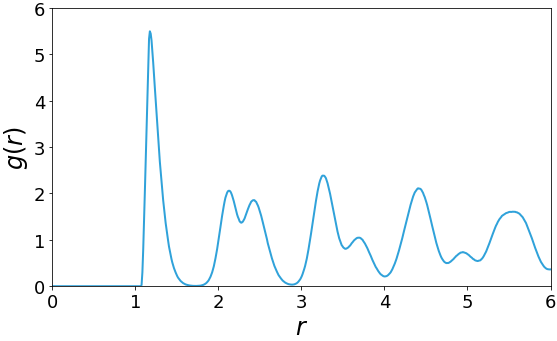

In [5]:
pyplot.figure(figsize=(8, 5))
# pyplot.title("RDF - Avg Frames")
pyplot.plot(r, y)
pyplot.xlabel(r"$r$")
pyplot.ylabel(r"$g\left(r\right)$")
pyplot.xlim(0,6)
pyplot.ylim(0,6)
pyplot.tight_layout()
pyplot.show()

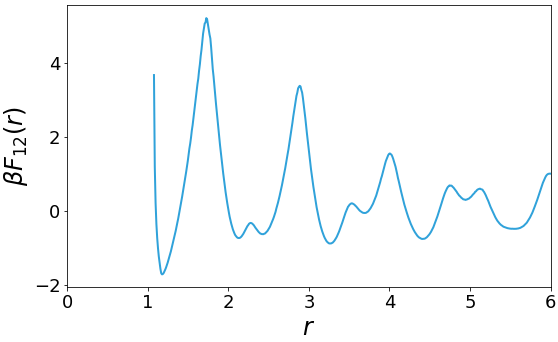

In [6]:
pyplot.figure(figsize=(8, 5))
# pyplot.title("RDF - Avg Frames")
pyplot.plot(r, -np.log(y))
pyplot.xlabel(r"$r$")
pyplot.ylabel(r"$\beta F_{12}\left(r\right)$")
pyplot.xlim(0,6)
# pyplot.ylim(0,6)
pyplot.tight_layout()
pyplot.show()